In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
df = pd.read_csv('road_accident.csv')
df.columns = [c.strip() for c in df.columns]

In [ ]:
df.head()


,Date,Year,Time,Day_of_Week,Barangay,Latitude,Longitude,Weather,Road_Condition,Vehicle_Type,Driver_Age,Driver_Gender,Accident_Cause,Road_Accident_Type,Injuries,Fatalities
0,04/08/2021,2021,21:15,Wednesday,I-C (Bagong Bayan),14.071215,121.322198,Sunny,Dry,Motorcycle,44,Male,Head-on collision,Drunk Driving,4,0
1,20/08/2021,2021,7:15,Friday,Santa Veronica (Bae),14.080453,121.330692,Sunny,Dry,Bicycle,38,Male,Rear-end collision,Drunk Driving,1,1
2,05/09/2023,2023,3:32,Tuesday,I-A (Sambat),14.080712,121.301354,Rainy,Wet,Car,29,Female,Side-impact collision,Reckless Driving,2,0
3,14/12/2021,2021,15:08,Tuesday,VI-A (Mavenida),14.047567,121.298669,Rainy,Wet,Motorcycle,50,Male,Side-impact collision,Overloading,5,0
4,05/02/2020,2020,13:01,Wednesday,San Lucas 2 (Malinaw),14.080015,121.329899,Rainy,Wet,Motorcycle,27,Male,Head-on collision,Fatigue,2,0


In [ ]:
df.columns




Index(['Date', 'Year', 'Time', 'Day_of_Week', 'Barangay', 'Latitude',
       'Longitude', 'Weather', 'Road_Condition', 'Vehicle_Type', 'Driver_Age',
       'Driver_Gender', 'Accident_Cause', 'Road_Accident_Type', 'Injuries',
       'Fatalities'],
      dtype='object')

In [ ]:
df.shape

(1500, 16)

In [ ]:
# Ensure required columns exist
required_cols = ['Year', 'Barangay', 'Road_Accident_Type', 'Accident_Cause', 'Fatalities']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

In [ ]:
# Extract Year
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Year'] = df['Date'].dt.year

In [ ]:
# Define features and target
X = df[['Year', 'Barangay', 'Road_Accident_Type', 'Accident_Cause']]
y = df['Fatalities'].apply(lambda x: 1 if x > 0 else 0)

print(f"Target distribution:\n{y.value_counts(normalize=True)}")

Target distribution:
Fatalities
0    0.792667
1    0.207333
Name: proportion, dtype: float64


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Barangay', 'Road_Accident_Type', 'Accident_Cause'])
    ],
    remainder='drop'
)

In [ ]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 1050, Test samples: 450


In [ ]:
# Predictions
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]


In [ ]:
# Classification Report
print("\n=== Logistic Regression - Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression - Classification Report ===
              precision    recall  f1-score   support

           0     0.8136    0.9412    0.8727       357
           1     0.4324    0.1720    0.2462        93

    accuracy                         0.7822       450
   macro avg     0.6230    0.5566    0.5594       450
weighted avg     0.7348    0.7822    0.7432       450



=== Logistic Regression - Confusion Matrix ===
[[336  21]
 [ 77  16]]


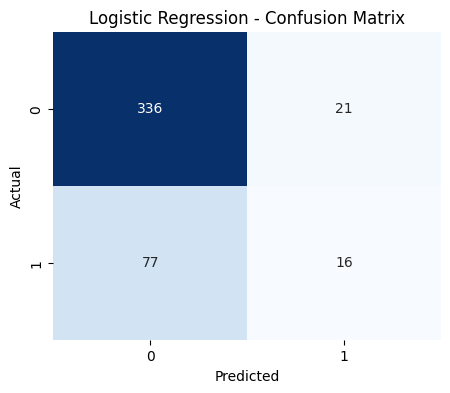

In [ ]:
# === Classification Report ===
cm = confusion_matrix(y_test, y_pred)
print("=== Logistic Regression - Confusion Matrix ===")
print(cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=== Logistic Regression - ROC AUC: 0.6784 ===


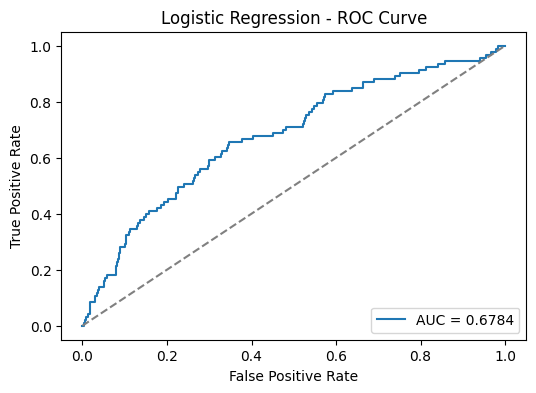

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"=== Logistic Regression - ROC AUC: {roc_auc:.4f} ===")
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
joblib.dump(pipe, "road_predictor_lr.pkl")
print("Saved model to road_predictor_lr.pkl")

Saved model to road_predictor_lr.pkl


After the installation is complete, please run the cell with the error again.

# Task
Train a Logistic Regression model to predict the occurrence of road accidents based on features like 'Road_Accident_Type' and 'Accident_Cause' using the dataset "Road_Accident_Data.csv".

## Data preparation

### Subtask:
Define the features (excluding 'Fatalities' and the non-predictive columns like 'Date' and 'Time') and the target variable (whether an accident occurred, which can be inferred from the dataset having entries only for accidents). Create a new binary target variable indicating the occurrence of an accident.


**Reasoning**:
Create the feature DataFrame by dropping the specified columns and create the binary target variable indicating accident occurrence.

